# Communicate Data findings Project 
## Saad Almlehe


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#AssessingAndCleaning">Assessing and Cleaning Data</a></li>   
    <li> <a href="#Univariate"> Univariate Exploration </a></li>
     <li> <a href="#Bivariate"> Bivariate Exploration </a></li>
     <li> <a href="#Multivariate">Multivariate Exploration </a></li>
   
</ul>


<a id='intro'></a>
### Introduction

>In this project, I will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships but before that I will gather, asses and clean data.
>
>The dataset: 
includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.
>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Load the dataset 

In [2]:
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id='AssessingAndCleaning'></a>
### Assessing data: 

In [3]:
bike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


- day name are not included
- day or night time should included 

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- id columns are not in string format 
- some cloumns have missing values 
- member_birth_year should be intger 


In [5]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


- member_birth_year have value of 1878 (143 year) - invalid . 
- since we have latitude and longitude for both start and end stations can calculate the distance btween stations.
- since member_birth_year we can calculate member age.
- we have duratrion outliers 

### Cleaning data: 

In [6]:
# copy the dataframe for cleaning
cleaning_bike = bike_df.copy()

###### define: drop observation with missing value

In [7]:
# code : 
# drop any obs with null value
cleaning_bike.dropna(inplace=True)

In [8]:
# test
cleaning_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

###### define: change id columns from float to string format ,  meber_year_age to intger and time to timedate

In [9]:
# code: start_station_id
cleaning_bike['start_station_id'] = cleaning_bike['start_station_id'].astype(int)
cleaning_bike['end_station_id'] = cleaning_bike['end_station_id'].astype(int)
cleaning_bike['start_station_id'] = cleaning_bike['start_station_id'].astype(str)
cleaning_bike['end_station_id'] = cleaning_bike['end_station_id'].astype(str)
cleaning_bike['bike_id'] = cleaning_bike['bike_id'].astype(str)
cleaning_bike['member_birth_year'] = cleaning_bike['member_birth_year'].astype(int)
cleaning_bike['start_time'] = pd.to_datetime(cleaning_bike['start_time'])
cleaning_bike['end_time'] = pd.to_datetime(cleaning_bike['end_time'])

In [10]:
# test : 
cleaning_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

###### define: drop member_birth_year have value of less than 1930 and more than 1998

In [11]:
# code
cleaning_bike = cleaning_bike[(cleaning_bike['member_birth_year'] >= 1930)& (cleaning_bike['member_birth_year'] < 1998)]

In [12]:
# test:
cleaning_bike[(cleaning_bike['member_birth_year'] < 1930)& (cleaning_bike['member_birth_year'] >= 1998)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


###### define: calculate thedistance btween stations in new column: 

- note: the function used to calculate the distance is taken form this website since I have no math background in this specific kind of math problem.        
  source: https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
  

In [13]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

In [14]:
# code : 

distance_btween_stations = []

for i in cleaning_bike.index:
    dist = haversine_distance(cleaning_bike['start_station_latitude'][i],cleaning_bike['start_station_longitude'][i], \
                              cleaning_bike['end_station_latitude'][i]  ,cleaning_bike['end_station_longitude'][i])
    distance_btween_stations.append(int(round(dist*1000 , 0)))
    
cleaning_bike['distance_btween_stations'] = distance_btween_stations

In [15]:
# test
cleaning_bike.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_btween_stations
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,540


###### define: calculate the age of mebers: 


In [16]:
# code

age = []

for i in cleaning_bike.index:
    age.append(2019 - cleaning_bike['member_birth_year'][i])

cleaning_bike['age'] = age

In [17]:
# test
cleaning_bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_btween_stations,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,540,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2700,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,260,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2410,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,3330,60


###### define: extract the day name from the start time in new column: 

In [18]:
# code
cleaning_bike['day_name'] = cleaning_bike['start_time'].dt.day_name()

In [19]:
# text 
cleaning_bike['day_name'].value_counts()

Thursday     32441
Tuesday      29445
Wednesday    27333
Friday       26570
Monday       24558
Saturday     13582
Sunday       13525
Name: day_name, dtype: int64

##### define: extract the times of day name from the start time in new column: 

MORNING
This is the time from midnight to midday.

AFTERNOON
This is the time from midday (noon) to evening.
From 12:00 hours to approximately 18:00 hours.

EVENING
This is the time from the end of the afternoon to midnight.
From approximately 18:00 hours to 00:00 hours.

In [20]:
# code
def timesOfDay(hour):
    if (hour >= 12) & (hour < 18):
        return 'afternoon'
    elif(hour >= 18) & (hour < 24):
        return 'eveing'
    elif (hour >= 0) & (hour < 12):
        return 'moring'
    else :
        return 'none'

In [21]:
daytime = []
for i in cleaning_bike.index:
    hour = cleaning_bike['start_time'][i].hour
    daytime.append(timesOfDay(hour))
    
cleaning_bike['day_time'] = daytime

In [22]:
# test
cleaning_bike['day_time'].value_counts()

moring       65458
afternoon    63472
eveing       38524
Name: day_time, dtype: int64

###### define: drop unneeded columns:

In [23]:
#code
cleaning_bike = cleaning_bike[cleaning_bike['duration_sec'] <= 7200]

In [24]:
# test 
cleaning_bike[cleaning_bike['duration_sec'] > 7200]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_btween_stations,age,day_name,day_time


In [25]:
cleand_bike = cleaning_bike.copy()

In [26]:
cleand_bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'distance_btween_stations', 'age', 'day_name', 'day_time'],
      dtype='object')

###### define: drop unneeded columns:

In [27]:
cleand_bike.drop(columns=['start_time', 'end_time','start_station_latitude','start_station_longitude',\
                          'end_station_latitude', 'end_station_longitude','member_birth_year','bike_share_for_all_trip'] , inplace=True)

In [28]:
cleand_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166932 entries, 4 to 183411
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   duration_sec              166932 non-null  int64 
 1   start_station_id          166932 non-null  object
 2   start_station_name        166932 non-null  object
 3   end_station_id            166932 non-null  object
 4   end_station_name          166932 non-null  object
 5   bike_id                   166932 non-null  object
 6   user_type                 166932 non-null  object
 7   member_gender             166932 non-null  object
 8   distance_btween_stations  166932 non-null  int64 
 9   age                       166932 non-null  int64 
 10  day_name                  166932 non-null  object
 11  day_time                  166932 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


### What is the structure of your dataset?

> the structure of the dataset have 12 columns and 174342 obsrvations.<br>
*duration_sec (int) <br>
 start_station_id(str)<br>
 start_station_name(str)<br>
 end_station_id(str)<br>
end_station_name(str)<br>
bike_id(str)<br>
user_type(str)<br>
member_gender(str)<br>
distance_btween_stations(int)<br>
age(int)<br>
day_name(str)<br>
day_time(str)*<br>

### What is/are the main feature(s) of interest in your dataset?

> duration_sec , daytime and gender these are my primary fouce in the data set

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> distance_btween_stations will help me to find some corrlation withduration_sec Also divding the day into (moring , evening and afternoon ) will allow me to go in depth . 
age will help me find avrages and patternt with gender and duration_sec.

<a id='Univariate'></a>
## Univariate Exploration

> In this section, i will investigate distributions of individual variables.

##### the distrubation of ages:

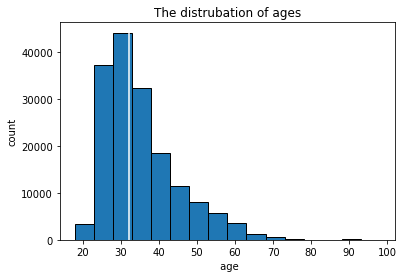

In [29]:
# here I Will create arange to visulaize better 
age_range = np.arange(18,99,5)

# here I will creat the chart and style it with bins and edge color
plt.hist(cleand_bike['age'] , bins = age_range , edgecolor = 'black' )

# here i will put some char informations to be easy to read 
plt.xlabel(' age')
plt.ylabel('count')
plt.title('The distrubation of ages')
# here i will find the median to compare it to the other graph 
plt.axvline(cleand_bike['age'].median() , color = 'white');

- we have left skewed distribution with median around 32.

##### days frequency: 

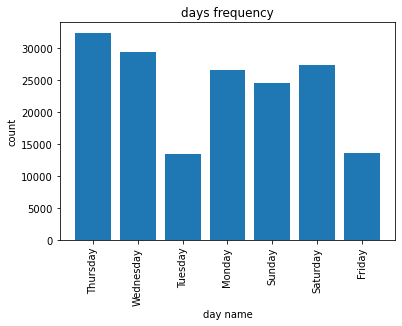

In [30]:
# Return the Series having unique values
x = cleand_bike['day_name'].unique()

# Return the Series having frequency count of each unique value
y = cleand_bike['day_name'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('day name')
plt.ylabel('count')
plt.title('days frequency')
plt.xticks(rotation=90) 

# Dsiplay the plot
plt.show()

- the most frequent day is Tuesday and the less frequent is Wednesday

##### the day time: 

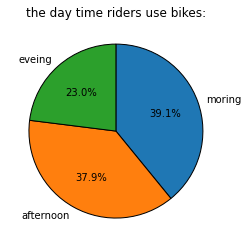

In [31]:
plt.title('the day time riders use bikes:')
# create pie chart and style it 
plt.pie(cleand_bike['day_time'].value_counts(), labels = cleand_bike['day_time'].value_counts().index, startangle = 90, counterclock = False ,\
         wedgeprops={'edgecolor' : 'black'} , autopct = '%1.1f%%');

- it seems great as we can see bike riding in the morning and afternoon are almost equal.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No , the data set was assessed  and cleaned very well 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> when I was assessing the data i noticed some outlier age and it were fixed

<a id='Bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in
data.

##### see the correlation between duration and start - end station distance :

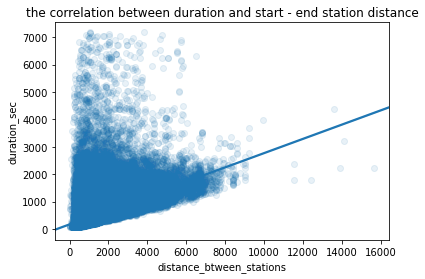

In [32]:
plt.xlabel('duration in seconds')
plt.ylabel('distance btween stations')
plt.title('the correlation between duration and start - end station distance')
# remove any bike that have returned in the same station
bike_v1 = cleand_bike[cleand_bike['distance_btween_stations'] != 0]
# remove one outlier 
bike_v1 = bike_v1[bike_v1['distance_btween_stations'] < 50000]
sb.regplot(data = bike_v1, x = 'distance_btween_stations', y = 'duration_sec', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

plt.scatter(data = bike_v1, x = 'distance_btween_stations', y = 'duration_sec', alpha=1/20);

- there are a positive correlation between the duration and the distance between the start and end station

##### the average  age in both genders:

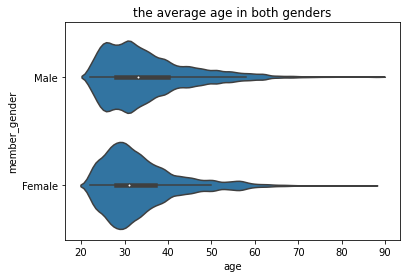

In [33]:
plt.title('the average age in both genders')
plt.ylabel('gender')
# store data frame without other in bike_v2
bike_v2 = cleand_bike[cleand_bike['member_gender'] != 'Other']
base_color = sb.color_palette()[0]
sb.violinplot(data=bike_v2, y='member_gender', x='age', color=base_color, innner='quartile');

- the average age seems qual to each gender however males have extreme values than females

##### the relation btween the user type and the duration : 

<BarContainer object of 2 artists>

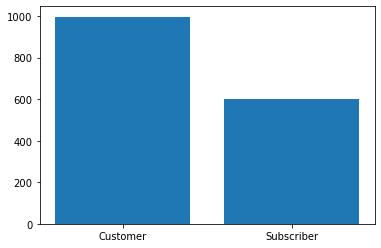

In [34]:
# using groupby method to store user type with duration mean
user_duration = cleand_bike.groupby('user_type')['duration_sec'].mean()
plt.bar(user_duration.index , user_duration)

- it seems that customer spends more time that subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I notice that riders who have different start and end station have positive correlation between the time they spend and distance.<br>
average riders age are equal whether the gender is male or female.
 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes , even though customers are small compare to subscribers but they usually spend more time riding than  subscribers.

<a id='Multivariate'></a>
## Multivariate Exploration



##### the realtion btween the days and each day times : 

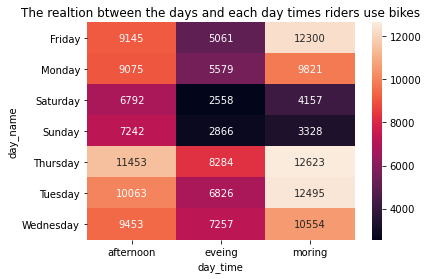

In [35]:
# creat heatmap and style it 
plt.xlabel('day time')
plt.ylabel('day name')
plt.title('The realtion btween the days and each day times riders use bikes')
days = cleand_bike.groupby(['day_name', 'day_time']).size()
days = days.reset_index(name='count')
days = days.pivot(index = 'day_name', columns = 'day_time', values = 'count')
sb.heatmap(days, annot = True, fmt = 'd');

- in weekend morning and evening we have the less riders active during the week 
- work days morning and afternoon we have the highest active riders 
- in the evening we usually have less riders that morning or afternoon

##### the relation of duration and ages based on gender :

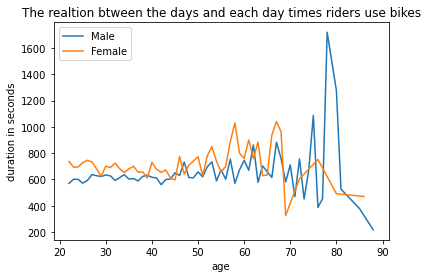

In [36]:
# store males and females 
plt.xlabel('age')
plt.ylabel('duration in seconds')
plt.title('The realtion btween the days and each day times riders use bikes')
male = cleand_bike[cleand_bike['member_gender'] == 'Male']
female = cleand_bike[cleand_bike['member_gender'] == 'Female']

# using groupby method to store age with duration mean 
male = male.groupby('age')['duration_sec'].mean()
female = female.groupby('age')['duration_sec'].mean()
# creat line chart and style it 
plt.plot(male.index , male , label = 'Male')
plt.plot(female.index , female , label = 'Female')
plt.legend();

- female riders in almost all ages spends more time than females 
- male riders have very significant different than females in age between 70 and 85 year old

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> riders are most active in work days moring and afternoon 
and less active in the whole weekend 

### Were there any interesting or surprising interactions between features?

> there are significant different in duration btween males and females in age between 70 and 85 year old

In [37]:
cleand_bike.to_csv('cleand.csv')